# Summary of most used Activation Functions

| Output                 | Output Range | Loss Function             | Derivative (for backpropagation)               | Uses                             |
|------------------------|--------------|---------------------------|-------------------------------|----------------------------------|
| Linear (no activation) | (-inf, +inf) | Squared Error Loss        |  1   | Linear Regression                |
| ReLU                   | [0, +inf)    | Mean Squared Error Loss   |  0 or 1  | Hidden Layer for everything. More efficient |
| Sigmoid                | [0, 1]       | Binary Cross Entropy Loss |  sigmoid * (1 - sigmoid)  | Binary Classification            |
| Softmax (Linear + Logits=True) | [0, 1]       | Categorical Cross Entropy |  sigmoid * (1 - sigmoid) | Output Layer for Multi-class Classification |


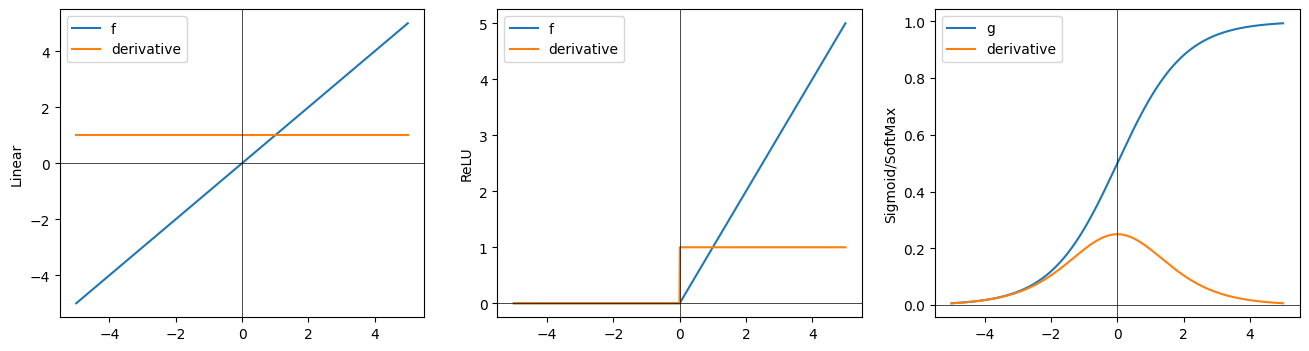

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return np.where(x>0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

ox = np.linspace(-5,5,1000)

fig, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].plot(ox, ox, label="f")
ax[0].plot(ox, np.ones(shape=ox.shape), label="derivative")
ax[1].plot(ox, np.maximum(ox,0), label="f")
ax[1].plot(ox, relu(ox), label="derivative")
ax[2].plot(ox, sigmoid(ox), label="g")
ax[2].plot(ox, sigmoid(ox) * (1 - sigmoid(ox)) , label="derivative")

ax[0].set_ylabel("Linear")
ax[1].set_ylabel("ReLU")
ax[2].set_ylabel("Sigmoid/SoftMax")

for i in range(len(ax)):
    ax[i].axhline(0, color="black", linewidth=0.5)
    ax[i].axvline(0, color="black", linewidth=0.5)
    ax[i].legend()

# Linear activation - not great

All layers of neural network will collapse into one if a linear activation function is used. No matter the number of layers in the neural network, the last layer will still be a linear function of the first. So, a linear activation function turns the multi-leayer neural network into just one layer.

Assume a1, a2, and a3 are linear layers:

$$
\begin{align*}
    a_1 &= w_1 \cdot x + b_1 \\
    a_2 &= w_2 \cdot a_1 + b_2 \\
    a_3 &= w_3 \cdot a_2 + b_3 &= w_3 \cdot (w_2 \cdot a_1 + b_2) + b_3 &= w_3 \cdot (w_2 \cdot (w_1 \cdot x + b_1) + b_2) + b_3 &= \text{linear}(x)
\end{align*}
$$

Assume a1, a2 are linear layers, and output layer a3 is logistic:

$$
\begin{align*}
    a_1 &= w_1 \cdot x + b_1 \\
    a_2 &= w_2 \cdot a_1 + b_2 \\
    a_3 &= \frac{1}{{1 + \exp^{-a_2}}} &= \frac{1}{{1 + \exp^{-\text{linear}(x)}}}
\end{align*}
$$

# Sigmoid vs SoftMax

In both cases vector z is generated by a linear function which is applied to a softmax function. 

$$z = \overrightarrow{w} * \overrightarrow{x} + b$$

Sigmoid and Softmax convert z into a probability distribution. Sigmoid activation is for 2 possible outcomes:

$$
\begin{cases}
    a_1 = g(z) = \frac{1}{1 + e^{-z}} = P(y=1|\overrightarrow{x})\\
    a_2 = 1 - a_1 = P(y=2|\overrightarrow{x})
\end{cases}
$$

SoftMax label is for multiple outcomes (ex. 4):
$$
\begin{cases}
    z_1 = \overrightarrow{w_1} \cdot \overrightarrow{x} + b_1 => a_1 = \frac{e^{z_1}}{e^{z_1} + e^{z_2} + e^{z_3} + e^{z_4}} = P(y = 1|\overrightarrow{x}) = 0.3\\
    z_2 = \overrightarrow{w_2} \cdot \overrightarrow{x} + b_2 => a_2 = \frac{e^{z_2}}{e^{z_1} + e^{z_2} + e^{z_3} + e^{z_4}} = P(y = 2|\overrightarrow{x}) = 0.2\\
    z_3 = \overrightarrow{w_3} \cdot \overrightarrow{x} + b_3 => a_3 = \frac{e^{z_3}}{e^{z_1} + e^{z_2} + e^{z_3} + e^{z_4}} = P(y = 3|\overrightarrow{x}) = 0.15\\
    z_4 = \overrightarrow{w_4} \cdot \overrightarrow{x} + b_4 => a_4 = \frac{e^{z_4}}{e^{z_1} + e^{z_2} + e^{z_3} + e^{z_4}} = P(y = 4|\overrightarrow{x}) = 0.35\\
\end{cases}
$$

To generalize:

$$
\begin{cases}
\text{Sigmoid}(x) = \frac{1}{{1 + e^{-x}}}\\
\text{SoftMax}(x_i) = \frac{{e^{x_i}}}{{\sum_{j=1}^{N} e^{x_j}}}
\end{cases}
$$

# SoftMax Cost

$$
\begin{array}{cc}
  Sigmoid Loss = \begin{cases}
    - \log(a_1) & \text{if $y_i=1$}\\
    - \log(1-a_1) & \text{if $y_i=0$}
  \end{cases}
\qquad VS \qquad
  SoftMax Loss = \begin{cases}
    - \log(a_1) & \text{if $y_i=1$}\\
    - \log(a_2) & \text{if $y_i=2$}\\
    - \log(a_3) & \text{if $y_i=3$}\\
    \cdots\\    
    - \log(a_N) & \text{if $y_i=N$}
  \end{cases}
\end{array}
$$

/var/folders/nr/pxyxhh4s2vl120p6__1g3z2c0000gn/T/ipykernel_20705/1418409871.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(ox, -np.log(ox))


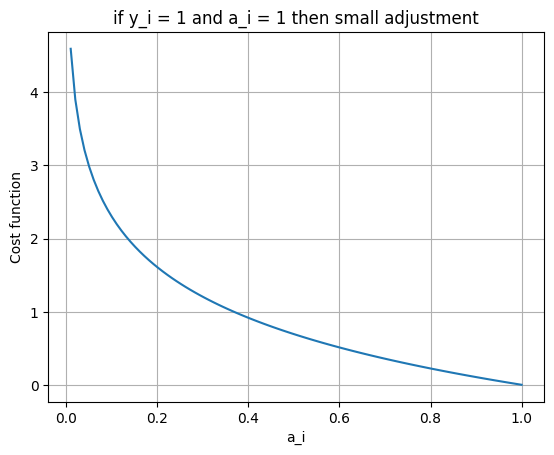

In [69]:
ox = np.linspace(0,1,100)

plt.plot(ox, -np.log(ox))
plt.ylabel("Cost function")
plt.xlabel("a_i")
plt.title("if y_i = 1 and a_i = 1 then small adjustment")
plt.grid(True)

# SoftMax rounding issue

Since too many log's are summed, each introduces a rounding error:

$$(1 + \frac{1}{9 \times 10^{10}}) - (1 - \frac{1}{9 \times 10^{10}}) = 2e^{-11}$$

In [71]:
a = 1 + 1 / 9e10
b = 1 - 1 / 9e10

a - b

2.2222224060897133e-11

Therefore, instead of SoftMax activation it is better to use: 
$$\text{Linear activation} \quad with\quad \text{Sparse CrossEntropy (Logits = True)}$$

# Sparse - MultiClass vs MultiLabel

### Sparse_CategoricalCrossentropy 
is Multiclass is when $y$ is one-dimensional, i.e can only take 1 state.

In this case $y$ is integer representing the class indices:

$$
\begin{bmatrix}
\text{car} \\
\text{person} \\
\text{bicycle}
\end{bmatrix}
->
\begin{bmatrix}
\text{1} \\
\text{0} \\
\text{0}
\end{bmatrix}
->
1
$$

### CategoricalCrossentropy 
Multilabel is when $y$ can take simultaniously multiple states (ex. "car" and "person").

Here, $y$ is hot-encoded, so result looks like [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], and [1,1,1]:

$$
\begin{bmatrix}
\text{car} \\
\text{person} \\
\text{bicycle}
\end{bmatrix}
->
\begin{bmatrix}
\text{1} \\
\text{0} \\
\text{1}
\end{bmatrix}
$$




Approach to solve multiclass is to treat 3 output neurons vector as 3 binary classification problems (sigmoid)